Top Influential Features:
 MedInc       0.688075
AveRooms     0.151948
Latitude     0.144160
HouseAge     0.105623
AveBedrms    0.046701
Name: price, dtype: float64


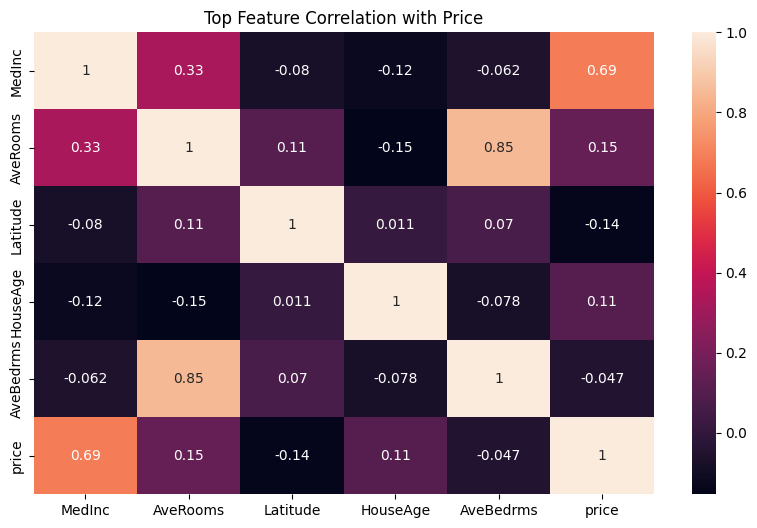

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
# df = pd.read_csv("house_data.csv")

# Load a sample dataset (e.g., California Housing dataset)
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['price'] = housing.target

# Encode categorical variables
# In this sample dataset, there are no categorical variables to encode.
# df = pd.get_dummies(df, drop_first=True)


# Correlation with target
correlation = df.corr()
top_features = correlation['price'].abs().sort_values(ascending=False)[1:6]  # Top 5
print("Top Influential Features:\n", top_features)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[top_features.index.tolist() + ['price']].corr(), annot=True)
plt.title("Top Feature Correlation with Price")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Check missing values
print(df.isnull().sum())

# Fill or drop missing
df = df.dropna()  # or use df.fillna(method='ffill')

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Feature-target split
X = df.drop('price', axis=1)
y = df['price']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data.sort_values(by="VIF", ascending=False))


      feature         VIF
7   Longitude  633.711654
6    Latitude  559.874071
2    AveRooms   45.993601
3   AveBedrms   43.590314
0      MedInc   11.511140
1    HouseAge    7.195917
4  Population    2.935745
5    AveOccup    1.095243


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

poly_rmse = np.sqrt(mean_squared_error(y_test, y_poly_pred))
poly_r2 = r2_score(y_test, y_poly_pred)

print("Polynomial RMSE:", poly_rmse)
print("Polynomial R²:", poly_r2)


Polynomial RMSE: 0.6813967448044631
Polynomial R²: 0.6456819729261931


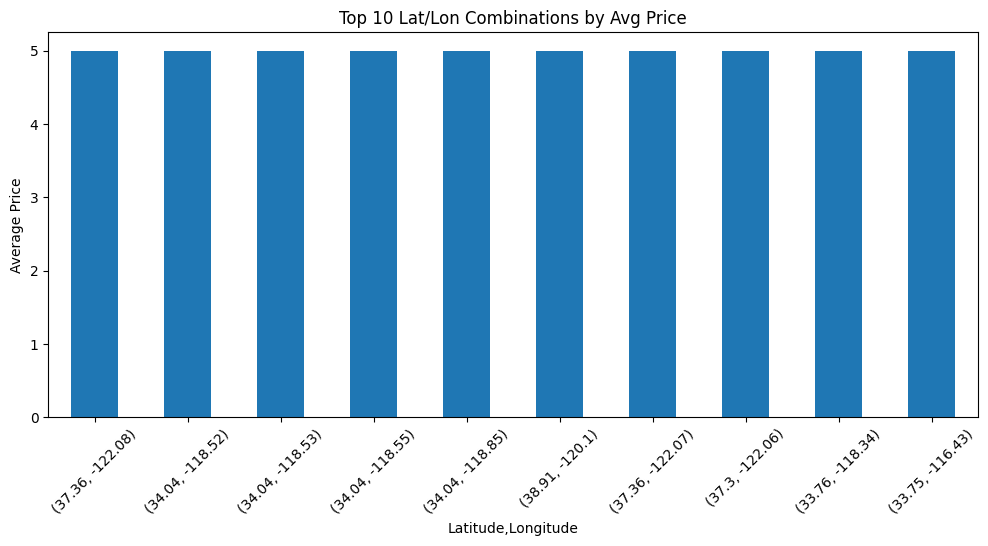

In [ ]:
# Average price by location (using Latitude and Longitude from the sample dataset)
# original_df = pd.read_csv("house_data.csv")
# avg_price_location = original_df.groupby('location')['price'].mean().sort_values(ascending=False)

# Group by Latitude and Longitude to approximate location
avg_price_location = df.groupby(['Latitude', 'Longitude'])['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
avg_price_location.head(10).plot(kind='bar')
plt.title("Top 10 Lat/Lon Combinations by Avg Price")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

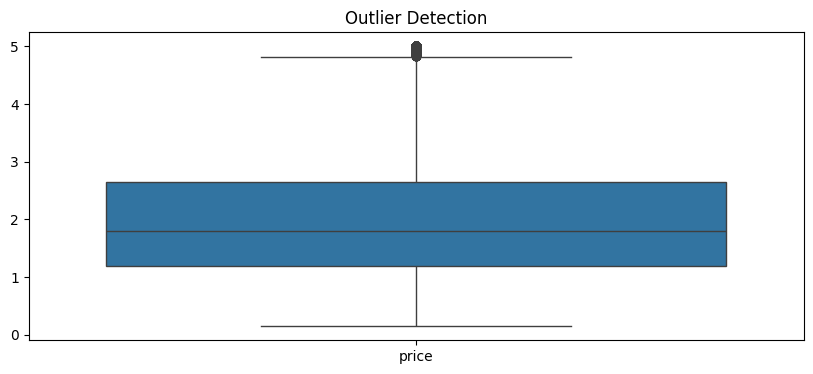

In [ ]:
import seaborn as sns

# Plotting boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['price']]) # Use df and plot only 'price' as 'area' is not in the dataset
plt.title("Outlier Detection")
plt.show()

# Remove outliers using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

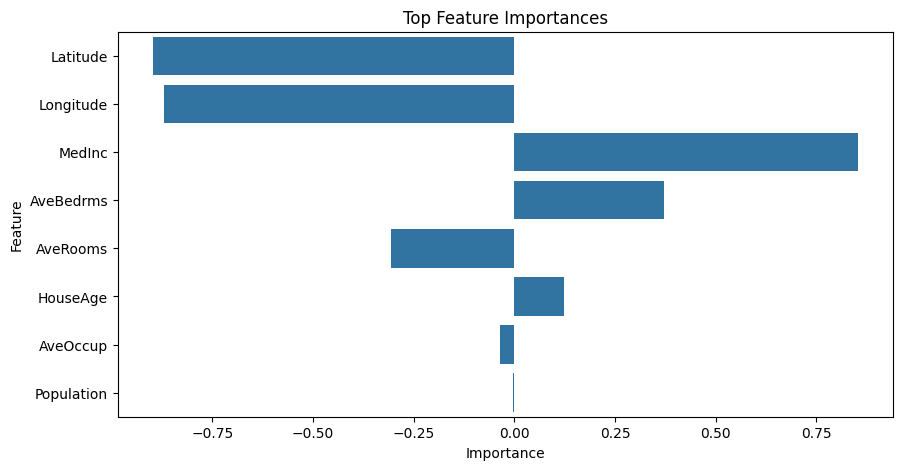

In [ ]:
importance = model.coef_
feature_names = X.columns
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

imp_df = imp_df.sort_values(by='Importance', key=abs, ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=imp_df.head(10), x='Importance', y='Feature')
plt.title("Top Feature Importances")
plt.show()


In [ ]:
import joblib

# Save model and scaler
joblib.dump(model, "house_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Load later for prediction
loaded_model = joblib.load("house_price_model.pkl")


In [ ]:
# Summary of missing
print(df.isnull().sum())

# Fill strategy
# df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median()) # Removed as 'bathrooms' column does not exist
# df.dropna(inplace=True) # Removed as there are no missing values to drop

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import joblib

joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Later...
model = joblib.load('model.pkl')


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

params = {'fit_intercept': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'fit_intercept': True}


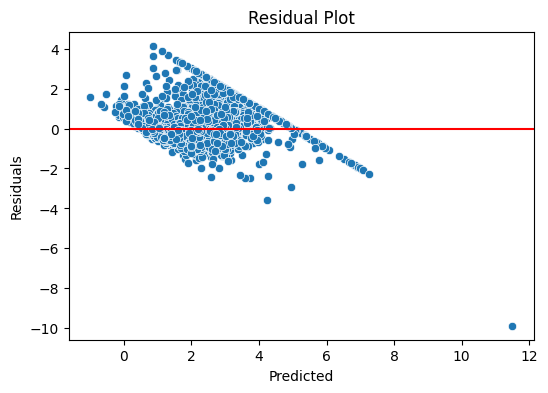

In [ ]:
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.title("Residual Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()
